In [1]:
import matplotlib.pyplot as plt
from DataIO.DataLib import datastream, DataLib, DatastreamPulls
from DataIO.MetaDataFile import CountryMetaDataFile

In [12]:
countryList = ['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']
countries = CountryMetaDataFile().readMetadata().loc[countryList]
start_date = '1980-01'


##Bespoke code name dictionaries
MSCIEquityDictionary = {
                        'US':'MSUSAML',
                        'AU':'MSAUSTL',
                        'JP':'MSJPANL',
                        'CN':'MSCNDAL',
                        'SW':'MSSWITL',
                        'UK':'MSUTDKL',
                        'ES':'MSSPANL',
                        'FR':'MSFRNCL',
                        'IT':'MSITALL',
                        'BD':'MSGERML'
}

dl = DataLib("SignalData")
dsPuller = DatastreamPulls(countries)


In [14]:
bondReturnIdx_locFX = dsPuller.ds_country_pull(lambda x: f'BM{x}10Y', start_date, 'RI', 'D')

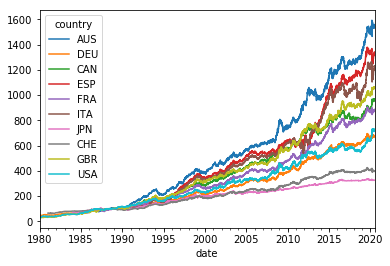

In [15]:
bondReturnIdx_locFX.plot()
plt.show()


In [16]:
dl.write_data("BondRetIdx/LocalFX",bondReturnIdx_locFX.to_timestamp())

In [17]:
longRates = dsPuller.ds_country_pull(lambda x: f'TR{x}10T', start_date, 'RY', 'M')



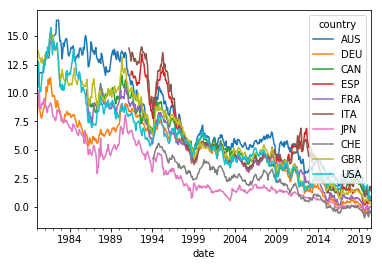

In [18]:
longRates.plot()
plt.show()



In [19]:
dl.write_data("LongRates",longRates.to_timestamp())


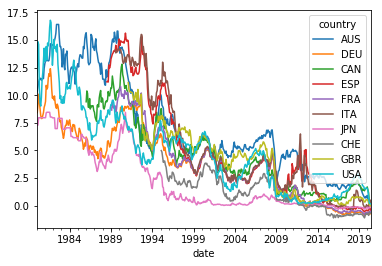

In [20]:
shortRates = dsPuller.ds_country_pull(lambda x: f'TR{x}2YT', start_date, 'RY', 'M')
shortRates.plot()
plt.show()
dl.write_data("ShortRates", shortRates.to_timestamp())



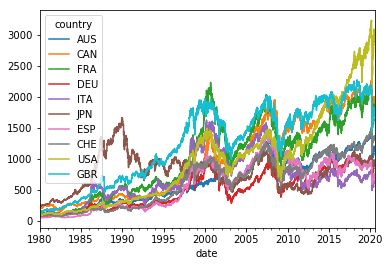

In [22]:
equityPrices = dsPuller.ds_country_pull(lambda x: MSCIEquityDictionary[x], start_date, 'MSPI', 'D')
equityPrices.plot()
plt.show()
dl.write_data("EquityPrices", equityPrices.to_timestamp())






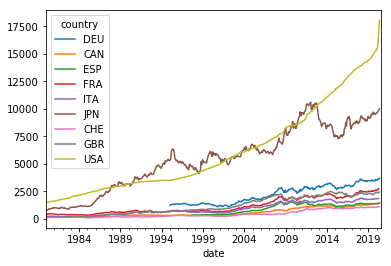

In [33]:
M2_usd = dsPuller.ds_country_pull(lambda x: f'{x}CMS2..B', start_date, '', 'M',list(filter(lambda x: x !='AUS', countryList)))
M2_usd.plot()
plt.show()
dl.write_data("M2/inUSD", M2_usd.to_timestamp())




In [35]:
M1_usd = dsPuller.ds_country_pull(lambda x: f'{x}CMS1..B', start_date, '', 'M',['AUS'])
M1_usd.plot()
plt.show()
dl.write_data("M1/inUSD", M1_usd.to_timestamp())


AttributeError: 'MultiIndex' object has no attribute 'to_period'

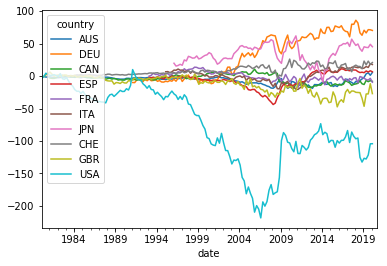

In [36]:
currentAccountNominal_usd = dsPuller.ds_country_pull(lambda x: f'{x}CCUR..B', start_date, '', 'M')
currentAccountNominal_usd.plot()
plt.show()
dl.write_data("CurrAcctNom/inUSD", currentAccountNominal_usd.to_timestamp())





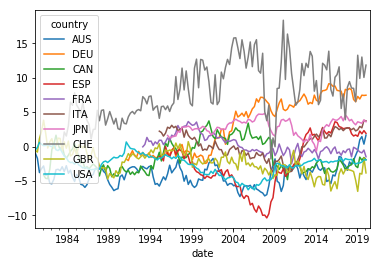

In [37]:
currentAccount_pctGDP = dsPuller.ds_country_pull(lambda x: f'{x}CCUR..Q', start_date, '', 'M')
currentAccount_pctGDP.plot()
plt.show()
dl.write_data("CurrAcctPctGDP", currentAccount_pctGDP.to_timestamp())



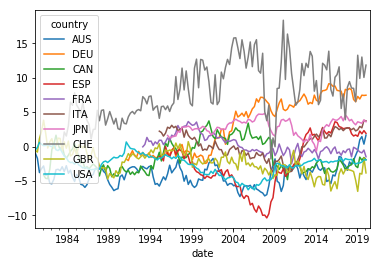

In [39]:
gdpNominal_usd = dsPuller.ds_country_pull(lambda x: f'{x}CGDP..A', start_date, '', 'M')
currentAccount_pctGDP.plot()
plt.show()
dl.write_data("CurrAcctPctGDP", currentAccount_pctGDP.to_timestamp())



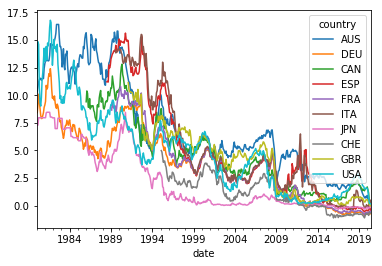

In [41]:
dtStore = DataLib("SignalData")
dt = dtStore.pull("ShortRates")
dt.plot()
plt.show()